This part deals specifically with the demonstration of propagator creation and application for DIRICHLET CONDITIONS (first and last ones given).

This can be further extended to application of Periodic Boundaries as well, but that has not been shown here.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time

from matplotlib.backends.backend_pdf import PdfPages


# N is the number of data points (matrix size), lambda is chosen as per program
def returnEulerPropagator(n, lam):
    # Create Euler matrix
    A_hat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                A_hat[i, j] = 1 - 2 * lam if i != 0 and i != n - 1 else 1
            elif abs(i - j) == 1:
                A_hat[i, j] = lam
    return A_hat

# sign- tells whether the forward or backward CN is to be returned:
def returnCNPropagator(n, lam, sign=1):
    # Create Crank-Nicolson matrices (A^+ and A^-)
    A_plus = np.zeros((n, n))
    A_minus = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                A_plus[i, j] = 1 - lam 
                A_minus[i, j] = 1 + lam
            elif abs(i - j) == 1:
                A_plus[i, j] = lam / 2
                A_minus[i, j] = -lam / 2

    if sign == 1:
        return A_plus
    elif sign == -1:
        return A_minus


# pd.DataFrame(returnCNPropagator(5, 0.25, sign=1))


Applying the VON NEUMANN BOUNDARY CONDITIONS. (derivatives given at first and last points, Euler applied to make it ready for application here.)

SUCCESSFUL

In [ ]:
# Parameters and size of the matrix
def returnEulerPropagator1(n,lam):
    # Correctly implementing the Euler propagation matrix (Â)
    A_hat_final = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                A_hat_final[i, j] = 1 - 2 * lam  # Diagonal elements
            elif abs(i - j) == 1:
                A_hat_final[i, j] = lam  # Off-diagonal elements
                if (i == 0 and j == 1) or (i == n - 1):
                    A_hat_final[i, j] = 2 * lam  # Boundary-specific elements
    return A_hat_final

# sign- tells whether the forward or backward CN is to be returned:
def returnCNPropagator1(n, lam, sign=1):
    # Create Crank-Nicolson matrices (A^+ and A^-)
    A_plus = np.zeros((n, n))
    A_minus = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                A_plus[i, j] = (1 - lam)
                A_minus[i, j] = (1 + lam)
            elif abs(i - j) == 1:
                A_plus[i, j] = lam / 2
                A_minus[i, j] = -lam / 2
                if i==0 or i==n-1:
                    A_plus[i, j] = lam
                    A_minus[i, j] = -lam
    
    if sign == 1:
        return A_plus
    elif sign == -1:
        return A_minus

pd.DataFrame(returnEulerPropagator1(10, 0.5))


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
pd.DataFrame(returnCNPropagator1(10, 1, sign=-1))

,0,1,2,3,4,5,6,7,8,9
0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.5,2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.5,2.0,-0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.5,2.0,-0.5,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,-0.5,2.0,-0.5,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,-0.5,2.0,-0.5,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,2.0,-0.5,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,2.0,-0.5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0


This part below attempts to create a solution for the diffusion problem.

In [20]:
# returning the B_matrix, containing the constant term as a result of the VON NEUMANN BCs
def returnBmatrix(lam, dx, Cprime_start, Cprime_end, N, method = "euler"):
    B = np.zeros(N)
    
    if method == "euler":
        B[0] =  -2 * lam * dx * Cprime_start
        B[-1] = 2 * lam * dx * Cprime_end
    elif method== "cn":
        B[0] =  -1 * lam * dx * Cprime_start
        B[-1] = 1 * lam * dx * Cprime_end
        
    return B
    

Euler benchmarking successful, Output exported into pdf

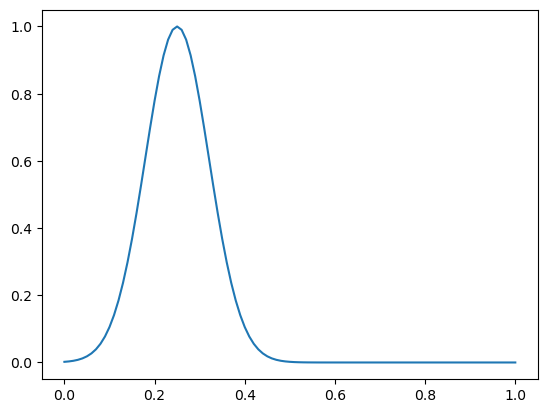

In [21]:
# initial profile to be taken as Gaussian

# creating the x-grid with the step size 0.01 (as given in the lecture notes)
dx = 0.01
x_start = 0
x_end = 1 
x = np.arange(x_start,x_end + dx,dx)

N = len(x) # no of data points in the x-grid determines the size of the array in 

# defining the initial Gaussian Profile, centred arsound 
x_peak = 0.25
sigma = 0.1
C0 = []
for x_el in x:
    C0.append(np.exp(- (x_el-x_peak)**2 / sigma **2 ))
    
plt.plot(x,C0) 

In [22]:
# pdffile = "euler-fwd.pdf"

# # defining the parameters
# # dx = defined above already, 0.01
# D = 0.01
# lam = 0.5

# dt = lam * dx**2 / D

# # obtaining the matrices for C[t_n+dt] = A C[t_n] + B
# A = returnEulerPropagator1(N, lam)
# B = returnBmatrix(lam, dx, 0, 0, N, method="euler")

# # now we can implement the matrix calculation
# t = np.arange(0, 1+dt, dt)

# Cn = C0

# with PdfPages(pdffile) as pdf:
#     for t_el in t:
#         Cn_plus_1 = np.dot(A,Cn) + B
#         Cn = Cn_plus_1

#         # plot created
#         plt.plot(x, C0, "k",label="at t=0")
#         plt.plot(x, Cn_plus_1,"r" ,label=f"at t={t_el} ")
#         plt.grid()
#         plt.legend()
#         plt.xlabel("x")
#         plt.ylabel("C(x,t)")
#         plt.ylim(0,1)
#         plt.title(f"Euler fwd: dx={dx}, lam={lam}, D={D}")
        
#         # plot added to PDF
#         pdf.savefig()
#         plt.close()
        


CN benchmarking,
Successful, cases running as expected and given in lecture notes


In [23]:
# pdffile = "crank-nicolson.pdf"

# # defining the parameters
# # dx = defined above already, 0.01
# D = 0.01
# lam = 25

# dt = lam * dx**2 / D

# # before getting started, we need the A+, A- and B matrices for the CN setup
# Aplus = returnCNPropagator1(N, lam , sign=1)
# Aminus = returnCNPropagator1(N, lam, sign=-1)

# B = returnBmatrix(lam, dx, 0, 0, N, method="cn")

# # now we can implement the matrix calculation
# t = np.arange(0, 1+dt, dt)

# # running this only for one iteration to check functioning for now.
# Cn = C0

# with PdfPages(pdffile) as pdf:
#     for t_el in t:
#         C_intermediate = np.dot(Aplus, Cn) + B          # Ctilde = Aplus Cn + B
#         Cn_plus_1 = np.dot( np.linalg.inv(Aminus) , C_intermediate + B )            # A minus Cn+1 - B = Ctilde  => (A minus inv)(Ctilde + B)
#         Cn = Cn_plus_1

#         # plot created
#         plt.plot(x, C0, "k",label="at t=0")
#         plt.plot(x, Cn_plus_1,"r" ,label=f"at t={t_el} ")
#         plt.grid()
#         plt.legend()
#         plt.xlabel("x")
#         plt.ylabel("C(x,t)")
#         plt.ylim(0,1)
#         plt.title(f"Euler fwd: dx={dx}, lam={lam}, D={D}")
        
#         # plot added to PDF
#         pdf.savefig()
#         plt.close()





Implementing interactive visualisation for the above.

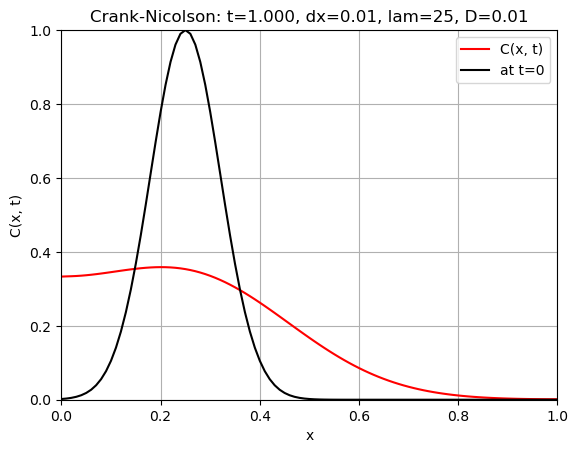

In [ ]:
# defining the parameters
# dx = defined above already, 0.01
D = 0.01
lam = 25

dt = lam * dx**2 / D

# before getting started, we need the A+, A- and B matrices for the CN setup
Aplus = returnCNPropagator1(N, lam , sign=1)
Aminus = returnCNPropagator1(N, lam, sign=-1)

B = returnBmatrix(lam, dx, 0, 0, N, method="cn")

# now we can implement the matrix calculation
t = np.arange(0, 1+dt, dt)

# running this only for one iteration to check functioning for now.
Cn = C0.copy() # creating a true copy instead of refernce pass

# Prepare figure for animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r', label="C(x, t)")
initial_line, = ax.plot(x, C0, 'k', label="at t=0")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel("C(x, t)")
ax.legend()
ax.grid()
ax.set_title(f"Crank-Nicolson: dx={dx}, lam={lam}, D={D}")

from matplotlib.animation import FuncAnimation

# Update function for animation
def update(frame):
    global Cn
    t_el = t[frame]
    
    # Compute next time step
    C_intermediate = np.dot(Aplus, Cn) + B
    Cn_plus_1 = np.linalg.solve(Aminus, C_intermediate + B)
    Cn = Cn_plus_1.copy()
    
    # Update line data
    line.set_data(x, Cn)
    ax.set_title(f"Crank-Nicolson: t={t_el:.3f}, dx={dx}, lam={lam}, D={D}")
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=len(t), interval=100, blit=True)

# To display animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())